### Expectation - Maximization for bivariate Gaussian Mixture Model

**Import required libraries**

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

color_set = ['red','green','blue','violet','pink','orange']  

**Load and preprocess dataset**

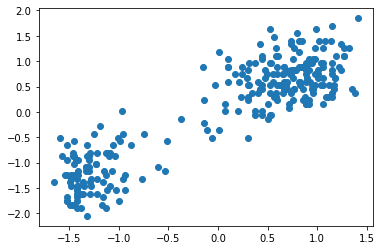

In [3]:
# Load dataset
data = pd.read_csv('faithful.csv')
data = data.iloc[:,1:]

# Standardize Data 
data['eruptions'] = (data['eruptions'] - data['eruptions'].mean())/ ( data['eruptions'].std())
data['waiting'] = (data['waiting'] - data['waiting'].mean())/ ( data['waiting'].std())

# Vizualize data 
plt.scatter(data.iloc[:,0],data.iloc[:,1])
plt.show()

**Fix some variables**

In [4]:
n = 50
xlist = np.linspace(-2, 2, n)
ylist = np.linspace(-2, 2, n)
X, Y = np.meshgrid(xlist, ylist)  # grid XY

**Function 1 : generate_data() -- to sample some data from gaussian distributions which is used for EM**

In [5]:
def generate_data(μ, Σ , K) : 
    F = []    
    for j in range(K): 
        f_k = multivariate_normal(μ[j], Σ[j])
        F.append(f_k)
        
    F_data = []
    
    for k in range(K):
        D = np.zeros(X.shape)
        for i in range(D.shape[0]): 
            for j in range(D.shape[1]) : 
                D[i,j] = F[k].pdf([X[i,j],Y[i,j]])
        F_data.append(D)
    
    return F, np.array(F_data)


**Function 2 : show_plot() -- plot gaussian distriubtions**

In [6]:
def show_plot(μ_curr, Σ_curr, Z, iteration ):
    F, F_data = generate_data(μ_curr, Σ_curr, K)
    contour_color = color_set[:K]
    for j in range(K):
        plt.contour(X,Y,F_data[j], levels=1, colors=contour_color[j])
    data_color = [contour_color[Z[i]] for i in range(N)]
    plt.scatter(data.iloc[:,0],data.iloc[:,1], color = data_color)
    plt.title('L = %d'%iteration)
    plt.show()

**EM algorithm implementation for GMM**

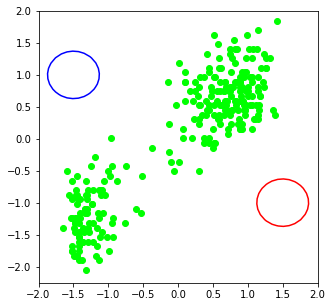

Begining EM Algorithm for GMM


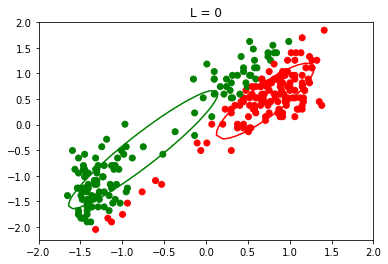

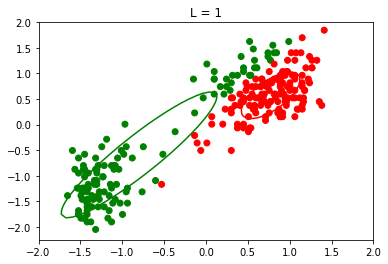

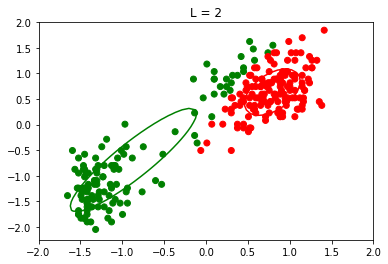

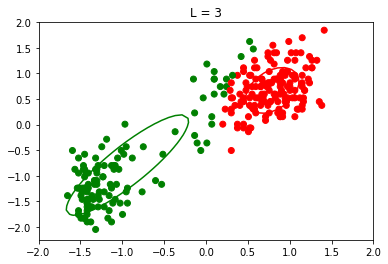

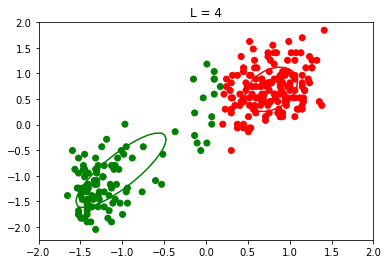

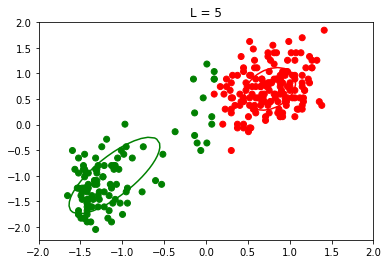

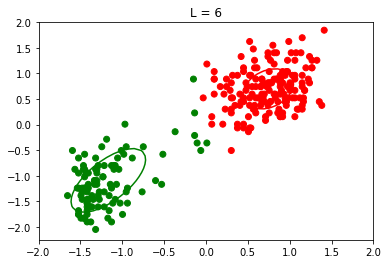

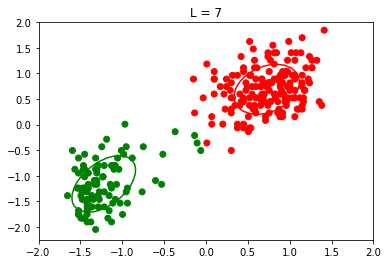

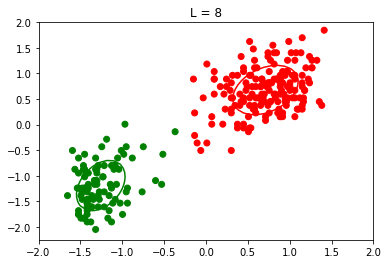

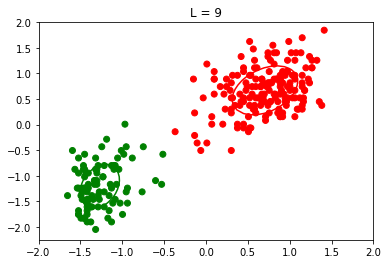

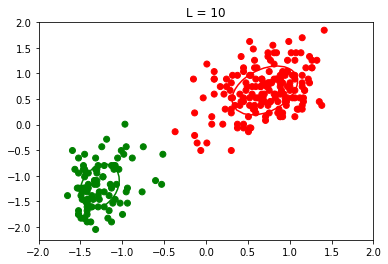

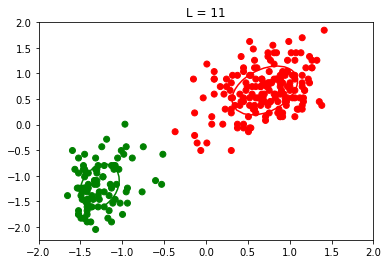

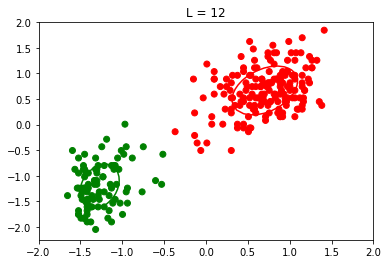

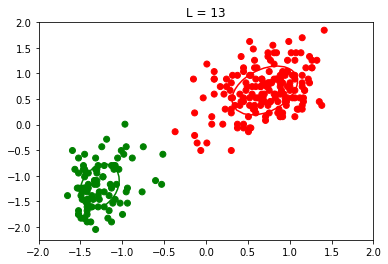

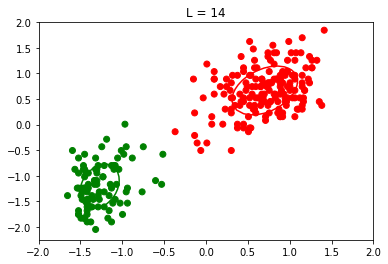

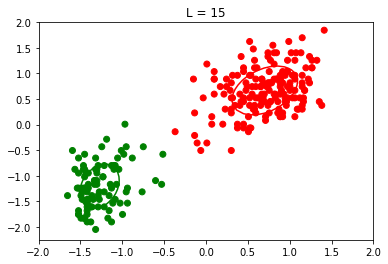

Finishing EM algorithm! Bye ^_^


In [7]:
K = 2  # No of Gaussian Distribution in Mixture

# Init Step : Randomly initialize μ1(0), μ2(0), Σ1(0), Σ2(0) 

μ1_0, μ2_0 = [1.5,-1], [-1.5,1]
Σ1_0 = Σ2_0 = [ [0.1,0],[0,0.1] ]

μ_prev = np.array([μ1_0, μ2_0])
μ_curr = μ_prev.copy()

Σ_prev = np.array([Σ1_0 , Σ2_0])
Σ_curr = Σ_prev.copy()

π1_0 = np.random.rand(1)
π2_0 = 1 - π1_0

π_prev = np.array([π1_0, π2_0])
π_curr = π_prev.copy()

F, F_data = generate_data(μ_curr, Σ_curr, K )

# Plot initial status
plt.figure(figsize=(5,5))
plt.contour(X,Y,F_data[0],levels=1,colors = 'red')
plt.contour(X,Y,F_data[1],levels=1, colors='blue')
plt.scatter(data.iloc[:,0],data.iloc[:,1],color='lime')
plt.show()


print("Begining EM Algorithm for GMM")

N = len(data)
γ_prev = [ [0 for j in range(K)] for i in range(N) ]
γ_curr = γ_prev.copy()

t = 0 
epsilon = 10**(-5)

Z = [np.random.choice(range(K)) for i in range(N)]  # randomly assign every point to exactly one of K classes

while True :  
    
    # E-Step starts 
    for i in range(N): 
        point = data.iloc[i,:].values
        for j in range(K) : 
            γ_curr[i][j] =  π_prev[j]*F[j].pdf([point[0],point[1]])/ \
            sum( [  π_prev[k]*F[k].pdf([point[0],point[1]]) for k in range(K) ])
        Z[i] = np.argmax(γ_curr[i])
    # End of E-Step
    
    
    
    # M-Step Begins

    π_curr = np.array([ sum([γ_curr[i][j] for i in range(N)])/N for j in range(K) ] )
    μ_curr = np.array([sum([γ_curr[i][j]*data.iloc[i,:].values for i in range(N)])/sum([γ_curr[i][j] for i in range(N)]) \
                       for j in range(K)])        
    Σ_curr = np.array([ sum( [ γ_curr[i][j]*(data.iloc[i,:].values.reshape(1,2) - μ_curr[j].reshape(1,2)).T * (data.iloc[i,:].values.reshape(1,2) - μ_curr[j].reshape(1,2)) for i in range(N)])/ \
                       sum([γ_curr[i][j]  for i in range(N)])   for j in range(K)])
    
    # End of M-Step 

    F = [ multivariate_normal(μ_curr[j], Σ_curr[j]) for j in range(K)]
    
    show_plot(μ_curr, Σ_curr, Z,t)
    
    # Check for convergence 

    if ( np.linalg.norm(Σ_curr- Σ_prev) < epsilon ) and \
       ( np.linalg.norm(μ_curr - μ_prev) < epsilon ) and \
       ( np.linalg.norm(π_curr - π_prev) < epsilon )  : 
        print("Finishing EM algorithm! Bye ^_^")
        break

    μ_prev, π_prev, Σ_prev = μ_curr.copy(), π_curr.copy(), Σ_curr.copy() 

    t = t+1
